In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io.wavfile
import itertools

In [2]:
ones = []
zeros = []
test = []

In [3]:
#import image from sets
for i in range(45):
    rate, one = scipy.io.wavfile.read("training_ones/1_jackson_"+str(i)+".wav",mmap=False)
    rate, zero = scipy.io.wavfile.read("training_zeros/0_jackson_"+str(i)+".wav",mmap=False)
    ones.append(np.asarray(one))
    zeros.append(np.asarray(zero))

for i in range(10):
    rate, t = scipy.io.wavfile.read("test/"+str(i)+".wav",mmap=False)
    test.append(np.asarray(t))

In [4]:
max_len = np.max([np.max([len(a) for a in ones]), np.max([len(a) for a in zeros]), np.max([len(a) for a in test])])                                                   

In [5]:
ones = np.asarray([np.pad(a,(0, max_len - len(a)),'constant', constant_values=0) for a in ones])
zeros = np.asarray([np.pad(a,(0, max_len - len(a)),'constant', constant_values=0) for a in zeros])
test = np.asarray([np.pad(a,(0, max_len - len(a)),'constant', constant_values=0) for a in test])

In [6]:
zeros_avg = np.average(zeros, axis = 0)
ones_avg = np.average(ones, axis = 0)
zeros_avg = zeros_avg/np.linalg.norm(zeros_avg)
ones_avg = ones_avg/np.linalg.norm(ones_avg)

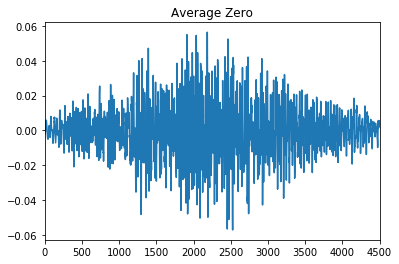

In [7]:
plt.plot(zeros_avg)
plt.title("Average Zero")
plt.xlim(0,4500)
plt.show()

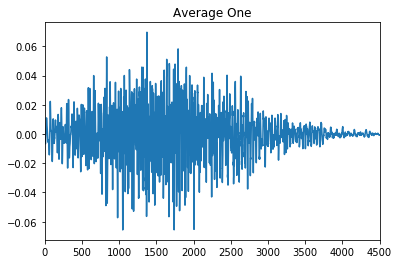

In [8]:
plt.plot(ones_avg)
plt.title("Average One")
plt.xlim(0,4500)
plt.show()

In [9]:
counter = 0

In [10]:
test_val = test[counter]/np.linalg.norm(test[counter])

In [11]:
if np.linalg.norm(test_val-zeros_avg) < np.linalg.norm(test_val-ones_avg):
    print("i think this is zeros.")
    plt.plot(zeros_avg,alpha=0.4,label = "Average")
    plt.plot(test_val, alpha=0.4, label = "Test")
else:
    print("i think this is a one.")
    plt.plot(ones_avg, alpha=0.4,label = "Average")
    plt.plot(test_val, alpha=0.4, label="Test")

i think this is zeros.


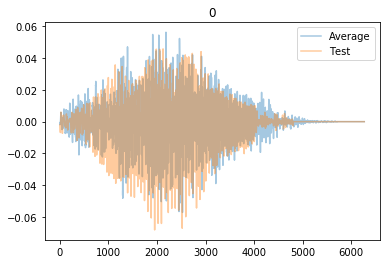

In [12]:
plt.title(counter)
plt.legend()
plt.show()

In [13]:
counter += 1
if counter >= len(test):
    counter = 0

In [20]:
one/np.linalg.norm(one)

array([-0.00176019, -0.00213103, -0.00250709, ...,  0.00114908,
        0.00133711,  0.00164005])

In [29]:
test_val = test[counter]/np.linalg.norm(test[counter])
ones_distances = [np.linalg.norm(one/np.linalg.norm(one) - test_val)for one in ones]
zeros_distances = [np.linalg.norm(zero/np.linalg.norm(zero) - test_val) for zero in zeros]

In [32]:
if min(zeros_distances) < min(ones_distances):
    print("i think this is zeros.")
    neigbor = zeros[np.argmin(zeros_distances)]
    plt.plot(neigbor/np.linalg.norm(neigbor),alpha=0.4,label = "Cloest Neighbor")
    plt.plot(test_val, alpha=0.4, label = "Test")
else:
    print("i think this is a one.")
    plt.plot(neigbor/np.linalg.norm(neigbor), alpha=0.4,label = "Average")
    plt.plot(test_val, alpha=0.4, label="Test")

i think this is zeros.


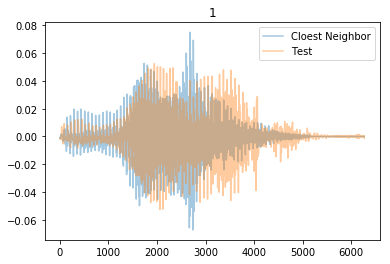

In [33]:
plt.title(counter)
plt.legend()
plt.show()

In [ ]:
#Savitzky–Golay filter